In [1]:
#Importing all libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC  
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

import statistics

In [2]:
#read and shuffle data
df = pd.read_csv("dataset_comb.csv")
df = df.sample(frac = 1)

In [3]:
df['Class'].value_counts()

jasmine    9985
Gonen      8200
Name: Class, dtype: int64

In [4]:
df = df.drop(['id'], axis = 1)
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
421,5463,130.964374,54.286664,0.910043,5629,83.400885,0.598685,306.634,0.730130,2.412459,jasmine
15046,9205,162.685029,72.800534,0.894287,9495,108.259734,0.658770,390.435,0.758815,2.234668,Gonen
14541,8837,158.905855,71.670264,0.892512,9070,106.073644,0.766170,377.847,0.777827,2.217180,Gonen
7242,6062,154.817347,50.606843,0.945066,6210,87.854301,0.729922,341.458,0.653358,3.059218,jasmine
11488,7301,141.611305,67.271861,0.879961,7546,96.415361,0.791008,343.633,0.776967,2.105060,Gonen
...,...,...,...,...,...,...,...,...,...,...,...
14764,8291,154.207560,69.296615,0.893345,8464,102.744484,0.567255,365.457,0.780089,2.225326,Gonen
6551,6815,130.582768,67.568802,0.855719,7060,93.151100,0.701926,325.713,0.807245,1.932590,Gonen
5726,5664,147.931670,49.798089,0.941637,5806,84.921309,0.558580,326.076,0.669415,2.970629,jasmine
755,6281,144.640305,56.509156,0.920523,6402,89.427164,0.708437,336.952,0.695189,2.559591,jasmine


In [5]:
#min-max normalisation
#convert class variables:   0 - jasmine & 1 - Gonen
for column in df.columns:
    if column!='Class':
        maxx = df[column].max()
        minn = df[column].min()
        for e in df[column]:
            e1 = (maxx - e)/(maxx - minn)
            df[column] = df[column].replace(e, e1)
    elif column == 'Class':
        for e in df[column]:
            if e == 'jasmine':
                df[column] = df[column].replace(e, 0)
            elif e == 'Gonen':
                df[column] = df[column].replace(e, 1)

In [6]:
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
421,0.617456,0.478987,0.587112,0.195539,0.638154,1.954015,0.571963,0.648089,0.239151,0.587138,0
15046,0.130723,0.188180,0.202535,0.249845,0.179499,1.986336,0.452587,0.379061,0.199865,0.656759,1
14541,0.178590,0.222827,0.226014,0.255963,0.229921,1.954014,0.239212,0.419472,0.173828,0.663607,1
7242,0.539542,0.260309,0.663551,0.074823,0.569225,1.954014,0.311227,1.627245,0.344296,0.333877,0
11488,0.378382,0.381379,0.317379,0.299223,0.410725,1.953514,0.189865,0.529310,0.175005,0.707512,1
...,...,...,...,...,...,...,...,...,...,...,...
14764,0.249610,0.265900,0.275320,0.253093,0.301815,1.954014,0.634406,0.459248,0.170729,0.660417,1
6551,0.441597,0.482485,0.311211,0.382779,0.468383,1.954014,0.366848,0.586839,0.133537,0.775049,1
5726,0.591311,0.323435,0.680351,0.086639,0.617155,1.954015,0.651641,1.627256,0.322305,0.368567,0
755,0.511056,0.353609,0.540946,0.159414,0.546447,1.954015,0.353913,1.630712,0.287006,0.529524,0


In [7]:
data = df.to_numpy()
data.shape

(18185, 11)

In [8]:
#splitting into 7 folds
data_g = np.array_split(data, 7)

# Logistic Regression

In [9]:
accuracy_log_test = []
accuracy_log_train = []

for i in range(7):
    test_data = data_g[i]
    test_data_x = []
    test_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:10])
                train_data_y.append(data_g[j][w][10])
        elif j == i:
            for w in range(len(data_g[j])):
                test_data_x.append(data_g[j][w][:10])
                test_data_y.append(data_g[j][w][10])
                
    #convert into array
    test_data_xn = np.array(test_data_x)
    train_data_xn = np.array(train_data_x)
    test_data_yn = np.array(test_data_y)
    train_data_yn = np.array(train_data_y)
    
    #importing model from sklearn 
    clf = LogisticRegression(random_state = 0)
    clf.fit(train_data_xn, train_data_yn)
    
    #predict class
    test_pred_y_log = clf.predict(test_data_xn)
    train_pred_y_log = clf.predict(train_data_xn)
    
    #calculating and appending accuracies
    acc1_log = accuracy_score(test_data_yn, test_pred_y_log)
    accuracy_log_test.append(acc1_log)
    
    acc2_log = accuracy_score(train_data_yn, train_pred_y_log)
    accuracy_log_train.append(acc2_log)

In [10]:
#printing accuracies 
print("Mean accuracy for test set = ", statistics.mean(accuracy_log_test))
print("Mean accuracy for train set = ", statistics.mean(accuracy_log_train))

Mean accuracy for test set =  0.9870222436440697
Mean accuracy for train set =  0.9870772606327832


# Linear Perceptron

In [11]:
accuracy_lp_test = []
accuracy_lp_train = []

for i in range(7):
    test_data = data_g[i]
    test_data_x = []
    test_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:10])
                train_data_y.append(data_g[j][w][10])
        elif j == i:
            for w in range(len(data_g[j])):
                test_data_x.append(data_g[j][w][:10])
                test_data_y.append(data_g[j][w][10])

    #convert into array  
    test_data_xn = np.array(test_data_x)
    train_data_xn = np.array(train_data_x)
    test_data_yn = np.array(test_data_y)
    train_data_yn = np.array(train_data_y)
    
    #importing model from sklearn
    clf = Perceptron(tol = 1e-3, random_state=0)
    clf.fit(train_data_xn, train_data_yn)
    
    #predict class
    test_pred_y_lp = clf.predict(test_data_xn)
    train_pred_y_lp = clf.predict(train_data_xn)
    
    #calculating and appending accuracies
    acc1_lp = accuracy_score(test_data_yn, test_pred_y_lp)
    accuracy_lp_test.append(acc1_lp)
    
    acc2_lp = accuracy_score(train_data_yn, train_pred_y_lp)
    accuracy_lp_train.append(acc2_lp)

In [12]:
#printing accuracies 

print("Mean accuracy for test set = ", statistics.mean(accuracy_lp_test))
print("Mean accuracy for train set = ", statistics.mean(accuracy_lp_train))

Mean accuracy for test set =  0.9797639342335167
Mean accuracy for train set =  0.9787094769191089


# SVM

In [13]:
accuracy_svm_test = []
accuracy_svm_train = []

for i in range(7):
    test_data = data_g[i]
    test_data_x = []
    test_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:10])
                train_data_y.append(data_g[j][w][10])
        elif j == i:
            for w in range(len(data_g[j])):
                test_data_x.append(data_g[j][w][:10])
                test_data_y.append(data_g[j][w][10])
                
    #convert into array
    test_data_xn = np.array(test_data_x)
    train_data_xn = np.array(train_data_x)
    test_data_yn = np.array(test_data_y)
    train_data_yn = np.array(train_data_y)
    
    #importing model from sklearn
    clf = SVC(kernel = 'rbf')
    clf.fit(train_data_xn, train_data_yn)
    
    #predict class
    test_pred_y_svm = clf.predict(test_data_xn)
    train_pred_y_svm = clf.predict(train_data_xn)

    #calculating and appending accuracies
    acc1_svm = accuracy_score(test_data_yn, test_pred_y_svm)
    accuracy_svm_test.append(acc1_svm)
    
    acc2_svm = accuracy_score(train_data_yn, train_pred_y_svm)
    accuracy_svm_train.append(acc2_svm)

In [14]:
#printing accuracies 
print("Mean accuracy for test set = ", statistics.mean(accuracy_svm_test))
print("Mean accuracy for train set = ", statistics.mean(accuracy_svm_train))

Mean accuracy for test set =  0.9887270633183709
Mean accuracy for train set =  0.9886261598552634


# Naive Bayes

In [15]:
accuracy_nb_test = []
accuracy_nb_train = []

for i in range(7):
    test_data = data_g[i]
    test_data_x = []
    test_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:10])
                train_data_y.append(data_g[j][w][10])
        elif j == i:
            for w in range(len(data_g[j])):
                test_data_x.append(data_g[j][w][:10])
                test_data_y.append(data_g[j][w][10])
       
    #convert into array         
    test_data_xn = np.array(test_data_x)
    train_data_xn = np.array(train_data_x)
    test_data_yn = np.array(test_data_y)
    train_data_yn = np.array(train_data_y)
    
    #importing model from sklearn
    clf = GaussianNB()
    clf.fit(train_data_xn, train_data_yn)
    
    #predict class
    test_pred_y_nb = clf.predict(test_data_xn)
    train_pred_y_nb = clf.predict(train_data_xn)

    #calculating and appending accuracies
    acc1_nb = accuracy_score(test_data_yn, test_pred_y_nb)
    accuracy_nb_test.append(acc1_nb)
    
    acc2_nb = accuracy_score(train_data_yn, train_pred_y_nb)
    accuracy_nb_train.append(acc2_nb)

In [16]:
#printing accuracies 
print("Mean accuracy for test set = ", statistics.mean(accuracy_nb_test))
print("Mean accuracy for train set = ", statistics.mean(accuracy_nb_train))

Mean accuracy for test set =  0.9846025883819537
Mean accuracy for train set =  0.9846210248142574


# Fisher Linear Discriminant

In [17]:
accuracy_fl_test = []
accuracy_fl_train = []

for i in range(7):
    test_data = data_g[i]
    test_data_x = []
    test_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:10])
                train_data_y.append(data_g[j][w][10])
        elif j == i:
            for w in range(len(data_g[j])):
                test_data_x.append(data_g[j][w][:10])
                test_data_y.append(data_g[j][w][10])
                
    #convert into array
    test_data_xn = np.array(test_data_x)
    train_data_xn = np.array(train_data_x)
    test_data_yn = np.array(test_data_y)
    train_data_yn = np.array(train_data_y)
    
    #importing model from sklearn
    clf = LinearDiscriminantAnalysis()
    clf.fit(train_data_xn, train_data_yn)
    
    #predict class
    test_pred_y_fl = clf.predict(test_data_xn)
    train_pred_y_fl = clf.predict(train_data_xn)
    
    #calculating and appending accuracies
    acc1_fl = accuracy_score(test_data_yn, test_pred_y_fl)
    accuracy_fl_test.append(acc1_fl)
    
    acc2_fl = accuracy_score(train_data_yn, train_pred_y_fl)
    accuracy_fl_train.append(acc2_fl)

In [18]:
#printing accuracies
print("Mean accuracy for test set = ", statistics.mean(accuracy_fl_test))
print("Mean accuracy for train set = ", statistics.mean(accuracy_fl_train))

Mean accuracy for test set =  0.9840527995465163
Mean accuracy for train set =  0.9840986155635392


# Artificial Neural Networks

In [19]:
accuracy_ann_test = []
accuracy_ann_train = []

for i in range(7):
    test_data = data_g[i]
    test_data_x = []
    test_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:10])
                train_data_y.append(data_g[j][w][10])
        elif j == i:
            for w in range(len(data_g[j])):
                test_data_x.append(data_g[j][w][:10])
                test_data_y.append(data_g[j][w][10])
                
    #convert into array
    test_data_xn = np.array(test_data_x)
    train_data_xn = np.array(train_data_x)
    test_data_yn = np.array(test_data_y)
    train_data_yn = np.array(train_data_y)
    
    #importing model from sklearn
    clf = MLPClassifier(hidden_layer_sizes = (10, 10, 10, 10,), max_iter = 1000, activation = 'logistic', solver = 'adam', random_state = 1)
    
    clf.fit(train_data_xn, train_data_yn)
    
    #predict class
    test_pred_y_ann = clf.predict(test_data_xn)
    train_pred_y_ann = clf.predict(train_data_xn)
    
    #calculating and appending accuracies
    acc1_ann = accuracy_score(test_data_yn, test_pred_y_ann)
    accuracy_ann_test.append(acc1_ann)
    
    acc2_ann = accuracy_score(train_data_yn, train_pred_y_ann)
    accuracy_ann_train.append(acc2_ann)

In [20]:
#printing accuracies 
print("Mean accuracy for test set = ", statistics.mean(accuracy_ann_test))
print("Mean accuracy for train set = ", statistics.mean(accuracy_ann_train))

Mean accuracy for test set =  0.9875721806933963
Mean accuracy for train set =  0.9878746189952411


# Box Plot

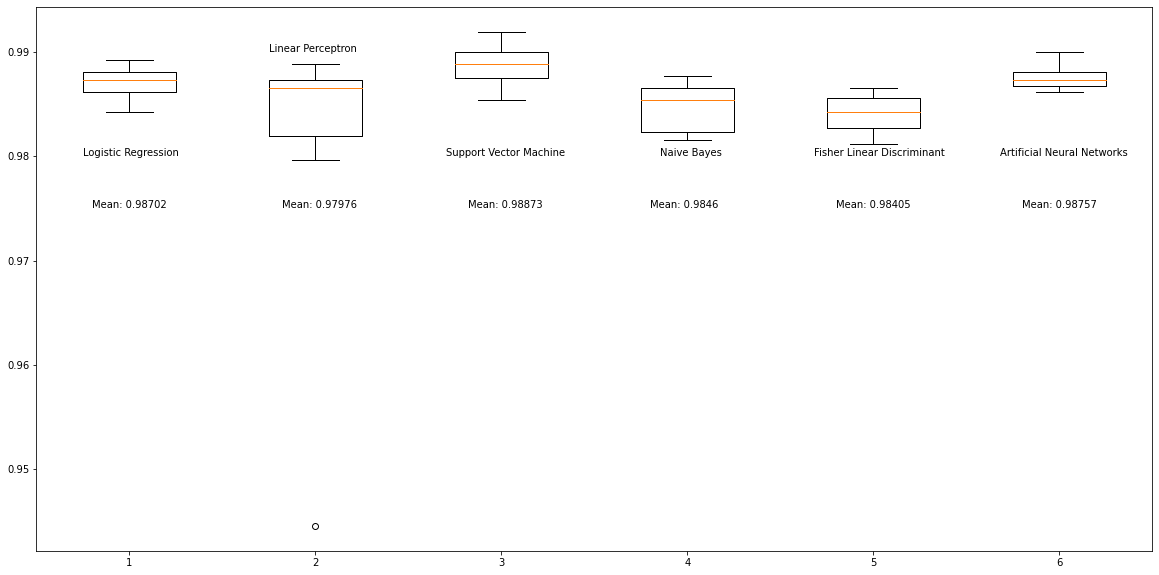

In [21]:
fig = plt.figure(figsize = (20, 10))
plt.boxplot([accuracy_log_test, accuracy_lp_test, accuracy_svm_test, accuracy_nb_test, accuracy_fl_test, accuracy_ann_test])

plt.text(0.75, 0.98, "Logistic Regression")
plt.text(0.80, 0.975, "Mean: " + str(round(statistics.mean(accuracy_log_test), 5)))

plt.text(1.75, 0.99, "Linear Perceptron")
plt.text(1.82, 0.975, "Mean: " + str(round(statistics.mean(accuracy_lp_test), 5)))

plt.text(2.70, 0.98, "Support Vector Machine")
plt.text(2.82, 0.975, "Mean: " + str(round(statistics.mean(accuracy_svm_test), 5)))

plt.text(3.85, 0.98, "Naive Bayes")
plt.text(3.80, 0.975, "Mean: " + str(round(statistics.mean(accuracy_nb_test), 5)))

plt.text(4.68, 0.98, "Fisher Linear Discriminant")
plt.text(4.80, 0.975, "Mean: " + str(round(statistics.mean(accuracy_fl_test), 5)))

plt.text(5.68, 0.98, "Artificial Neural Networks")
plt.text(5.80, 0.975, "Mean: " + str(round(statistics.mean(accuracy_ann_test), 5)))

plt.show() 